autoencoder: https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798 \
autoencoder: https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%203%20-%20Autoencoders.ipynb \
Unet: https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5 \
Convolutional autoencoder maths: https://pgaleone.eu/neural-networks/2016/11/24/convolutional-autoencoders/ \
Convolutional autoencoder code: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import os, os.path
from keras import layers
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from IPython.display import clear_output
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [5]:
#SIMPLE AUTOENCODER

In [4]:
numberOfFiles=0
try: 
    filesXtrain = os.listdir('../TrainingDataset/x_train/'); 
    filesXtrainLines = os.listdir('../TrainingDataset/x_train_lines/'); 
    if len(filesXtrain)>len(filesXtrainLines): 
        numberOfFiles=len(filesXtrainLines); 
    else: numberOfFiles=len(filesXtrain)   
except: None
numberOfFiles-=1
testingSetSize = 20
mx_train_lines = np.empty((numberOfFiles-testingSetSize,20,144))
mx_train = np.empty((numberOfFiles-testingSetSize,20,144))
mx_train_lines_nan = np.empty((numberOfFiles-testingSetSize,20,144))
mx_test_lines = np.empty((testingSetSize,20,144))
mx_test_lines_nan = np.empty((testingSetSize,20,144))
mx_test = np.empty((testingSetSize,20,144))

for i in range(0,numberOfFiles-testingSetSize):
    mx_train[i] = np.load('../TrainingDataset/x_train/indicatorVariationArrayLocalTime{}.npy'.format(i))
    mx_train_lines[i] = makeLines(mx_train[i])
    mx_train_lines_nan[i] = makeLines(mx_train[i])
for i in range(numberOfFiles-testingSetSize,numberOfFiles):
    mx_test[i-(numberOfFiles-testingSetSize)-1] = np.load('../TrainingDataset/x_train/indicatorVariationArrayLocalTime{}.npy'.format(i))
    mx_test_lines[i-(numberOfFiles-testingSetSize)-1] = makeLines(mx_test[i-(numberOfFiles-testingSetSize)-1])
    mx_test_lines_nan[i-(numberOfFiles-testingSetSize)-1] = makeLines(mx_test[i-(numberOfFiles-testingSetSize)-1])


# for i in range(0,90):
#     mx_train_lines[i] = np.load('../../../../media/cristille/PL_EXTHD1/IRAP/Training_Dataset/x_train_lines/indicatorVariationArrayLocalTime{}.npy'.format(i))
#     mx_train[i] = np.load('../../../../media/cristille/PL_EXTHD1/IRAP/Training_Dataset/x_train/indicatorVariationArrayLocalTime{}.npy'.format(i))

# for i in range(90,100):
#     mx_test_lines[i-90] = np.load('../../../../media/cristille/PL_EXTHD1/IRAP/Training_Dataset/x_train_lines/indicatorVariationArrayLocalTime{}.npy'.format(i))
#     mx_test[i-90] = np.load('../../../../media/cristille/PL_EXTHD1/IRAP/Training_Dataset/x_train/indicatorVariationArrayLocalTime{}.npy'.format(i))

mx_train_lines=np.nan_to_num(mx_train_lines)
mx_train=np.nan_to_num(mx_train)
mx_test_lines=np.nan_to_num(mx_test_lines)
mx_test=np.nan_to_num(mx_test)

In [18]:
mx_train = mx_train.reshape((len(mx_train), np.prod(mx_train.shape[1:])))
mx_train_lines = mx_train_lines.reshape((len(mx_train_lines), np.prod(mx_train_lines.shape[1:])))

In [3]:
def makeLines(array):
    lineStart=5
    lineEnd=15
    arrayLines=np.copy(array)
    for i in range(lineStart, lineEnd):
        arrayLines[i] = np.full_like(array[i], np.nan)
    return arrayLines

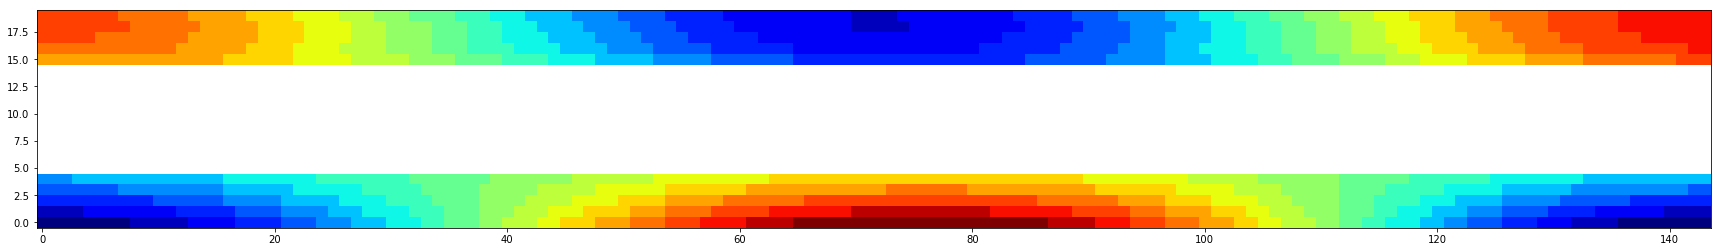

In [5]:
fig= plt.figure(figsize=(30,4))
plt.imshow(mx_train_lines_nan[8], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')

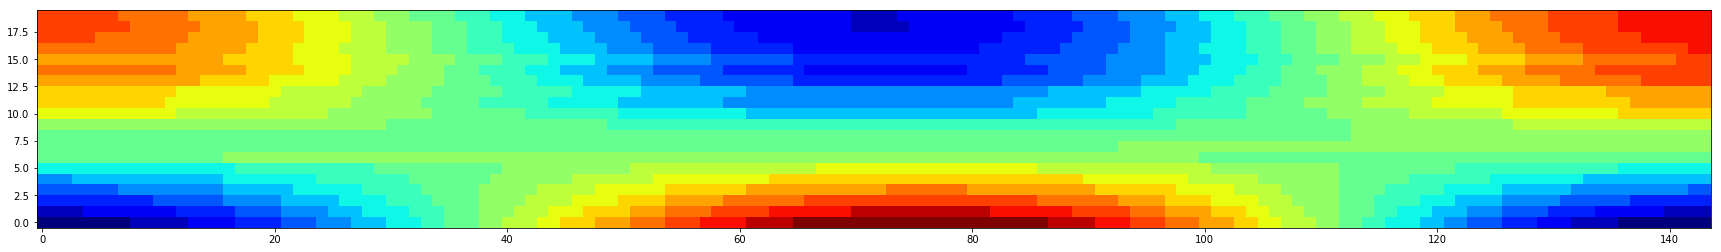

In [6]:
fig= plt.figure(figsize=(30,4))
plt.imshow(mx_train[8], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')

In [28]:
input_size = 2880
hidden_size = 1440
hidden2_size = 720
code_size = 360

input_img = Input(shape=(2880,))
x = Dense(hidden_size, activation='relu')(input_img)
x = Dense(hidden_size, activation='relu')(x)
x = Dense(hidden2_size, activation='relu')(x)
x = Dense(hidden2_size, activation='relu')(x)
code = Dense(code_size, activation='relu')(x)
x = Dense(hidden2_size, activation='relu')(x)
x = Dense(hidden2_size, activation='relu')(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(x)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy')
autoencoder.fit(mx_train_lines, mx_train, epochs=10, batch_size=5)

Epoch 1/10
680/680 [==============================] - 2s 3ms/step - loss: 0.6946
Epoch 2/10
680/680 [==============================] - 2s 3ms/step - loss: 0.6860
Epoch 3/10
680/680 [==============================] - 2s 3ms/step - loss: 0.6460
Epoch 4/10
680/680 [==============================] - 2s 3ms/step - loss: 0.2267
Epoch 5/10
680/680 [==============================] - 2s 3ms/step - loss: -6.0759
Epoch 6/10
680/680 [==============================] - 2s 3ms/step - loss: -37.4402
Epoch 7/10
680/680 [==============================] - 2s 3ms/step - loss: -165.9713
Epoch 8/10
680/680 [==============================] - 2s 3ms/step - loss: -627.0446
Epoch 9/10
680/680 [==============================] - 2s 3ms/step - loss: -1490.5674
Epoch 10/10
680/680 [==============================] - 2s 3ms/step - loss: -4007.6304


In [29]:
testMatrixNumber=8

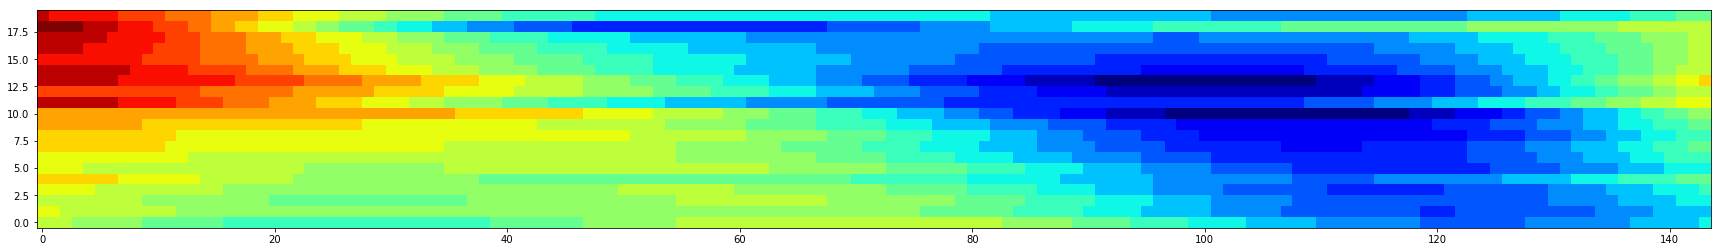

In [30]:
fig= plt.figure(figsize=(30,4))
plt.imshow(mx_test[testMatrixNumber].reshape(20,144), origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')

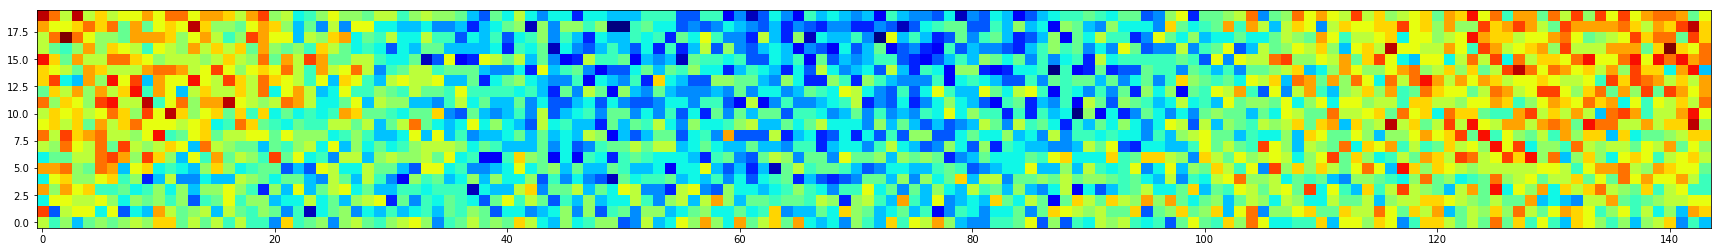

In [31]:
fig= plt.figure(figsize=(30,4))
plt.imshow(autoencoder.predict(mx_test_lines[testMatrixNumber].reshape(1,-1)).reshape(20,144), origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')

In [7]:
mx_train_lines = np.expand_dims(mx_train_lines,3)
mx_train = np.expand_dims(mx_train,3)

# mx_train_lines = np.squeeze(mx_train_lines,3)
# mx_train = np.squeeze(mx_train,3)

In [8]:
mx_train_lines.shape

(680, 20, 144, 1)

In [11]:
#CONVOLUTIONAL AUTOENCODER

input_img = keras.Input(shape=(20, 144, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 1), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
# x = Dense(1440, activation='relu')(x)
# x = Dense(144, activation='relu')(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

convolutional_autoencoder = keras.Model(input_img, decoded)
convolutional_autoencoder.compile(optimizer='adam', loss='mse')

In [12]:
convolutional_autoencoder._get_distribution_strategy = lambda: None
convolutional_autoencoder.fit(mx_train_lines, mx_train, epochs=10, batch_size=10, shuffle=True)

Epoch 1/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1350
Epoch 2/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1255
Epoch 3/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1245
Epoch 4/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1243
Epoch 5/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1242
Epoch 6/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1242
Epoch 7/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1244
Epoch 8/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1242
Epoch 9/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1241
Epoch 10/10
680/680 [==============================] - 2s 3ms/step - loss: 0.1241


/home/cristille/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


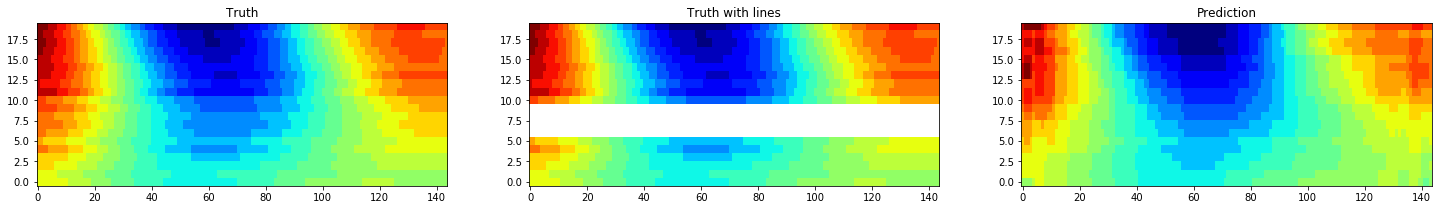

In [126]:
testMatrixNumber=19
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(mx_test[testMatrixNumber], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
ax1.set_title("Truth")
ax2.imshow(mx_test_lines_nan[testMatrixNumber], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
ax2.set_title("Truth with lines")
ax3.imshow(convolutional_autoencoder.predict(np.expand_dims(np.expand_dims(mx_test_lines[testMatrixNumber], 3), 0)).reshape(20,144), origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
ax3.set_title("Prediction")

fig.set_size_inches(25,3)
fig.show()

/home/cristille/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # This is added back by InteractiveShellApp.init_path()


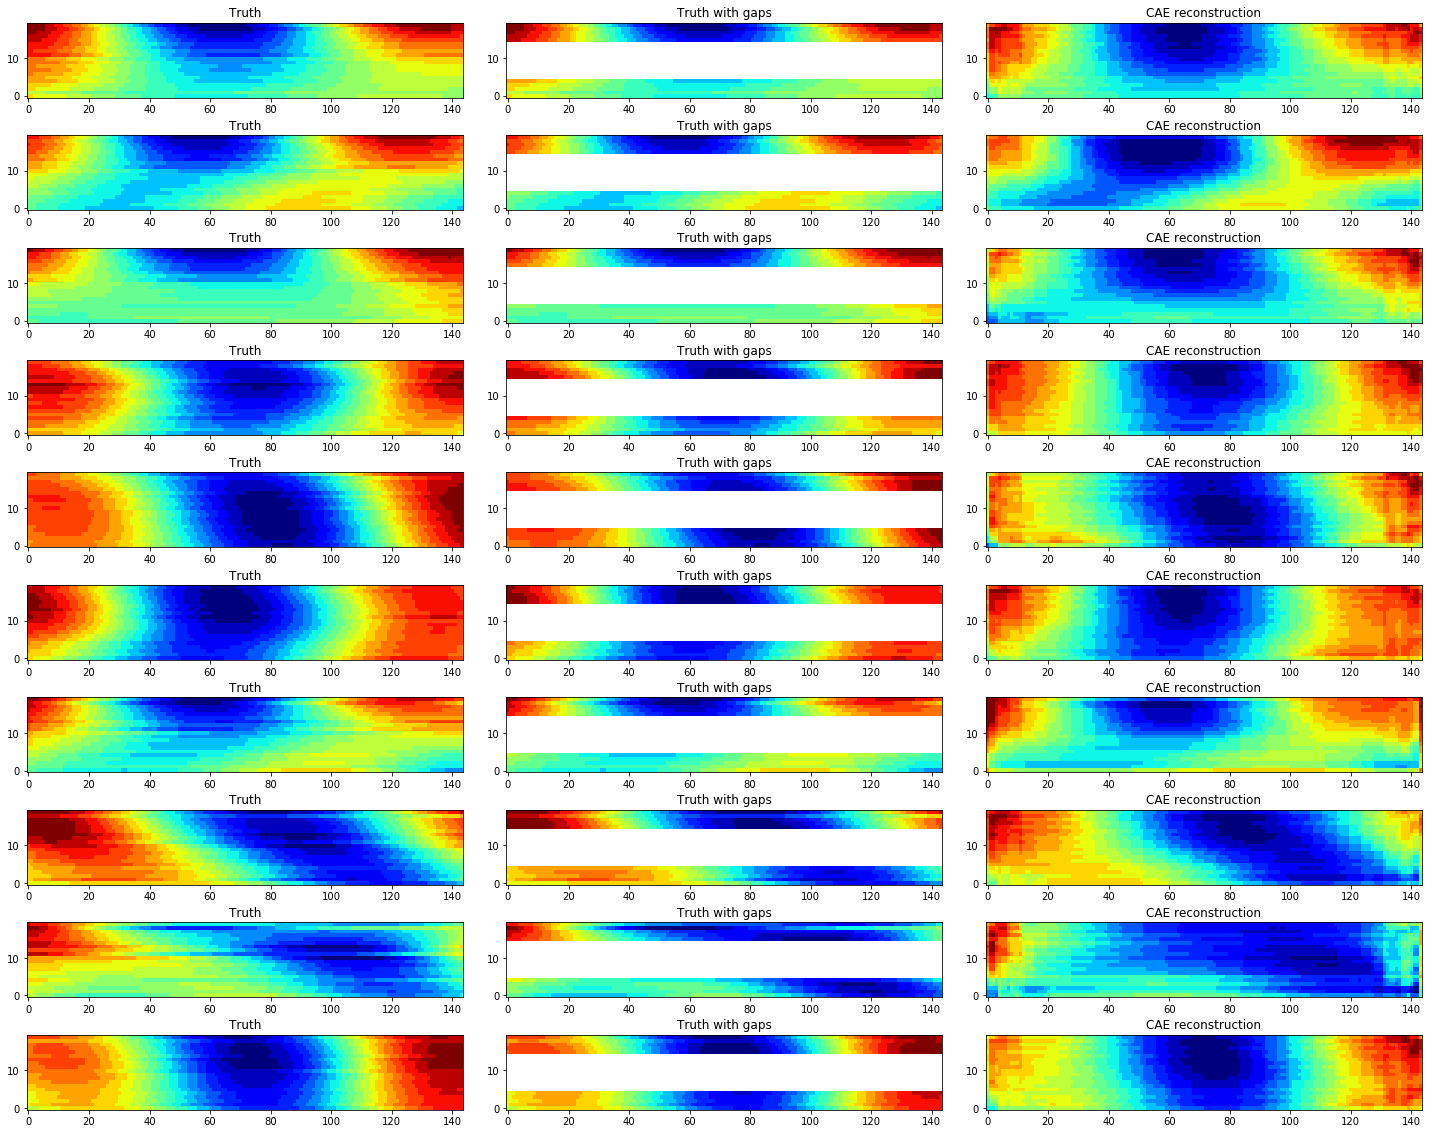

In [13]:
fig, axs = plt.subplots(10,3, figsize=(25, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel().reshape(10,3)

for y in range(10):
        axs[y][0].imshow(mx_test[y], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
        axs[y][0].set_title("Truth")
        axs[y][1].imshow(mx_test_lines_nan[y], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
        axs[y][1].set_title("Truth with gaps")
        axs[y][2].imshow(convolutional_autoencoder.predict(np.expand_dims(np.expand_dims(mx_test_lines[y], 3), 0)).reshape(20,144), origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
        axs[y][2].set_title("CAE reconstruction")
fig.savefig("Predictions")

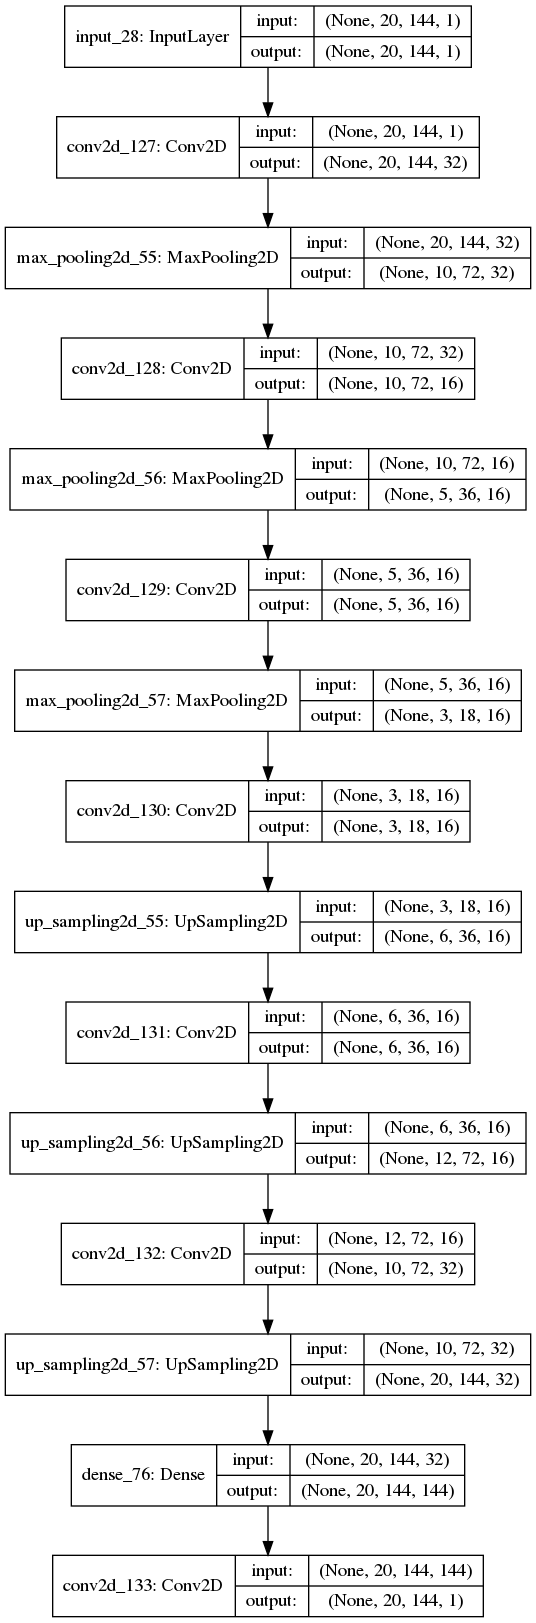

In [165]:
plot_model(convolutional_autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)